# gdp per capita and hk recycling rate

Model Summary (HK recycling rate ~ HK GDP per capita):
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                67.5333      4.503     14.996      0.000      58.072      76.995
HK GDP per capita -9.584e-05   1.45e-05     -6.616      0.000      -0.000   -6.54e-05

R-squared: 0.7086


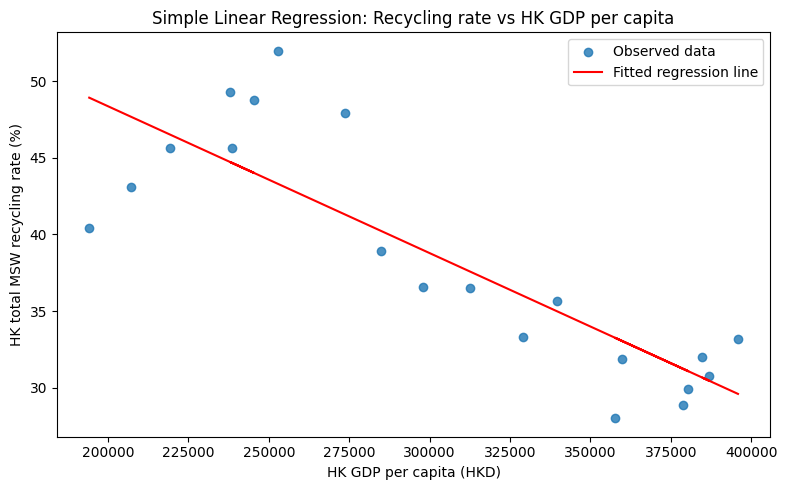

In [4]:
# !pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset (HK MSW Volume and Recycling Rat sheet is the default first sheet)
df = pd.read_excel("../General Stats_G@C_clean.xlsx")

### Simple Linear Regression: HK total MSW recycling rate vs HK GDP per capita

# ---------- Prepare data ----------
gdp_col  = "HK GDP per capita"
rate_col = "HK total MSW recycling rate"

# Clean GDP per capita (remove commas and convert to numeric)
df[gdp_col] = pd.to_numeric(
    df[gdp_col].astype(str).str.replace(",", ""),
    errors="coerce"
)

# Clean recycling rate: "40%" -> 40.0  (if the data were 0.40 etc. it would convert to 40.0 as well)
rate_raw = df[rate_col].astype(str).str.rstrip("%")
rate_num = pd.to_numeric(rate_raw, errors="coerce")
if rate_num.max() <= 1.0:
    rate_num = rate_num * 100.0
df["recycling_rate_pct"] = rate_num

# Keep rows where BOTH variables are available
mask = df[gdp_col].notna() & df["recycling_rate_pct"].notna()
X_gdp = df.loc[mask, [gdp_col]]
y_rate = df.loc[mask, "recycling_rate_pct"]

# ---------- Fit model using sklearn (for predictions) ----------
lin_reg_gdp = LinearRegression()
lin_reg_gdp.fit(X_gdp, y_rate)

# ---------- Fit model using statsmodels (for inference) ----------
X_gdp_sm = sm.add_constant(X_gdp)  # add intercept
model_gdp = sm.OLS(y_rate, X_gdp_sm)
results_gdp = model_gdp.fit()

# Predictions for plotting (same X order)
y_pred_gdp = lin_reg_gdp.predict(X_gdp)

print("Model Summary (HK recycling rate ~ HK GDP per capita):")
print(results_gdp.summary().tables[1])  # coefficient table
print(f"\nR-squared: {results_gdp.rsquared:.4f}")

# ---------- Plot ----------
plt.figure(figsize=(8, 5))
plt.scatter(X_gdp[gdp_col], y_rate, alpha=0.8, label="Observed data")
plt.plot(X_gdp[gdp_col], y_pred_gdp, color="red", label="Fitted regression line")

plt.xlabel("HK GDP per capita (HKD)")
plt.ylabel("HK total MSW recycling rate (%)")
plt.title("Simple Linear Regression: Recycling rate vs HK GDP per capita")
plt.legend()
plt.tight_layout()
plt.show()


**GDP per capita coefficient ($\hat \beta_1$) = −0.000095 (p < 0.001 < 0.05)**  

- There is a **significant negative association** between HK GDP per capita and the total MSW recycling rate: as GDP per capita increases, the overall recycling rate tends to decrease.  

- HK GDP per capita alone can explain **about 70% of the variance** in the HK total MSW recycling rate over the years in your dataset.
